In [1]:
import torch
import numpy as np
import pandas as pd
from os import listdir
import random
random.seed()   
import sklearn.mixture as mix
import talib
import matplotlib.pyplot as plt
from matplotlib import cm
import time
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

# Load data from Reuters

In [44]:
import eikon as ek
ek.set_app_id('604ea22425e048d39af0ef760ec9c64ebbe1fe68')
startdate='1000-01-20T15:04:05'
current_date=time.strftime("%Y-%m-%d")

TTF=ek.get_timeseries('TFMBYc1',start_date=startdate,end_date=current_date)
TTF = TTF.rename(columns={'CLOSE':'TTF_CLOSE'})
TTF = TTF.dropna(subset=['TTF_CLOSE'])
TTF['TTF_RSI'] = talib.RSI(TTF['TTF_CLOSE'],14).astype(float)
# display(TTF)

brent=ek.get_timeseries('LCOc12',start_date=startdate,end_date=current_date) 
brent = brent.rename(columns={'CLOSE':'brent_CLOSE'})
brent = brent.dropna(subset=['brent_CLOSE'])
brent['brent_RSI'] = talib.RSI(brent['brent_CLOSE'],14).astype(float)
# display(brent)

coal=ek.get_timeseries('TRAPI2Yc1',start_date=startdate,end_date=current_date)
coal = coal.rename(columns={'CLOSE':'coal_CLOSE'})
coal = coal.dropna(subset=['coal_CLOSE'])
# display(coal)
coal['coal_RSI'] = talib.RSI(coal['coal_CLOSE'],14).astype(float)
# display(coal)

CO2=ek.get_timeseries('CFI2c12',start_date=startdate,end_date=current_date)
CO2 = CO2.rename(columns={'CLOSE':'CO2_CLOSE'})
CO2 = CO2.dropna(subset=['CO2_CLOSE'])
CO2['CO2_RSI'] = talib.RSI(CO2['CO2_CLOSE'],14).astype(float)
# display(CO2)

data = pd.merge(pd.DataFrame(TTF['TTF_RSI']), pd.DataFrame(brent['brent_RSI']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(coal['coal_RSI']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(CO2['CO2_RSI']), how = 'inner', left_index=True, right_index=True)

data = pd.merge(data, pd.DataFrame(TTF['TTF_CLOSE']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(brent['brent_CLOSE']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(coal['coal_CLOSE']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(CO2['CO2_CLOSE']), how = 'inner', left_index=True, right_index=True)

select = data.ix[:].dropna()
data = data.dropna()

data['brent_Corr'] = data['TTF_CLOSE'].rolling(20).corr(data['brent_CLOSE'])
data['coal_Corr'] = data['TTF_CLOSE'].rolling(20).corr(data['coal_CLOSE'])
data['CO2_Corr'] = data['TTF_CLOSE'].rolling(20).corr(data['CO2_CLOSE'])
data = data.dropna()
X =  data[['TTF_RSI','brent_RSI','coal_RSI','CO2_RSI','brent_Corr','coal_Corr','CO2_Corr']].values
# data = pd.merge(data, pd.DataFrame(TTF['TTF_CLOSE']), how = 'inner', left_index=True, right_index=True)
display(data)

C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,TTF_RSI,brent_RSI,coal_RSI,CO2_RSI,TTF_CLOSE,brent_CLOSE,coal_CLOSE,CO2_CLOSE,brent_Corr,coal_Corr,CO2_Corr
Date,,,,,,,,,,,
2010-04-29,66.659712,67.463963,56.704272,71.839846,18.325,91.97,100.00,17.66,0.878579,0.906041,0.933025
2010-04-30,65.421544,70.450520,56.984472,76.872721,18.238,92.88,100.25,18.30,0.873835,0.908160,0.912648
2010-05-03,65.421544,74.872473,56.984472,80.989145,18.238,94.50,100.25,19.02,0.812545,0.909369,0.855174
2010-05-04,73.614333,56.452435,60.808560,67.810583,19.492,91.22,103.50,18.29,0.751422,0.909621,0.858562
2010-05-05,70.268606,47.031036,57.425287,68.192355,19.258,88.74,101.50,18.34,0.539444,0.902797,0.859032
2010-05-06,75.559683,39.215539,60.169812,69.590610,20.293,85.99,103.80,18.52,0.058924,0.887648,0.853614
2010-05-07,73.850315,36.864507,57.897966,57.997725,20.168,85.01,102.50,17.76,-0.227240,0.868082,0.806130
2010-05-10,68.608474,44.019329,55.719460,54.043026,19.776,86.95,101.25,17.45,-0.337365,0.850177,0.744425
2010-05-11,63.130390,45.527120,51.542365,58.469935,19.331,87.39,98.75,17.90,-0.431847,0.818266,0.704509


# Calculate optimal number of hidden states

[78346.48240790953, 75812.60927411294, 74743.51082088632, 74929.93219822865, 73985.67310698479, 74086.87912730915, 73765.98790376843, 73640.5673023929, 73413.1475189945]
[78146.1577213798, 75406.2363385812, 74131.08963635258, 74111.4627646929, 72961.15542444703, 72856.31319576938, 72329.37372322666, 71997.90487284912, 71564.43684044872]


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['courier prime code'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


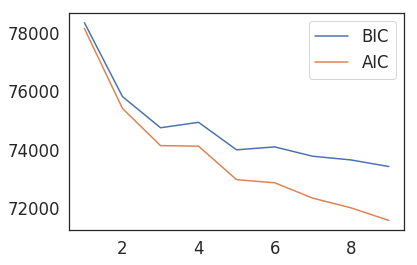

In [45]:

n_estimators = np.arange(1,10)
clfs = [mix.GaussianMixture(n_components=n,covariance_type="full",n_init=10,random_state=0).fit(X) for n in n_estimators]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]
print(bics)
print(aics)
plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend()

# train model with optimal number of hidden states

In [46]:
X =  data.values
model = mix.GaussianMixture(n_components=2,
                covariance_type="full",
                n_init=100,
                random_state=10).fit(X)
hidden_states = model.predict(X)
########################################################################### HMM #####################################
data['HMM_TTF'] = hidden_states
print(model.converged_)
display(data)

from sklearn.externals import joblib
# now you can save it to a file
joblib.dump(model, 'GMM.pkl') 
# and later you can load it
model = joblib.load('GMM.pkl')
print(hidden_states)

True


,TTF_RSI,brent_RSI,coal_RSI,CO2_RSI,TTF_CLOSE,brent_CLOSE,coal_CLOSE,CO2_CLOSE,brent_Corr,coal_Corr,CO2_Corr,HMM_TTF
Date,,,,,,,,,,,,
2010-04-29,66.659712,67.463963,56.704272,71.839846,18.325,91.97,100.00,17.66,0.878579,0.906041,0.933025,1
2010-04-30,65.421544,70.450520,56.984472,76.872721,18.238,92.88,100.25,18.30,0.873835,0.908160,0.912648,1
2010-05-03,65.421544,74.872473,56.984472,80.989145,18.238,94.50,100.25,19.02,0.812545,0.909369,0.855174,1
2010-05-04,73.614333,56.452435,60.808560,67.810583,19.492,91.22,103.50,18.29,0.751422,0.909621,0.858562,1
2010-05-05,70.268606,47.031036,57.425287,68.192355,19.258,88.74,101.50,18.34,0.539444,0.902797,0.859032,1
2010-05-06,75.559683,39.215539,60.169812,69.590610,20.293,85.99,103.80,18.52,0.058924,0.887648,0.853614,1
2010-05-07,73.850315,36.864507,57.897966,57.997725,20.168,85.01,102.50,17.76,-0.227240,0.868082,0.806130,1
2010-05-10,68.608474,44.019329,55.719460,54.043026,19.776,86.95,101.25,17.45,-0.337365,0.850177,0.744425,1
2010-05-11,63.130390,45.527120,51.542365,58.469935,19.331,87.39,98.75,17.90,-0.431847,0.818266,0.704509,1


[1 1 1 ... 0 0 0]


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['courier prime code'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


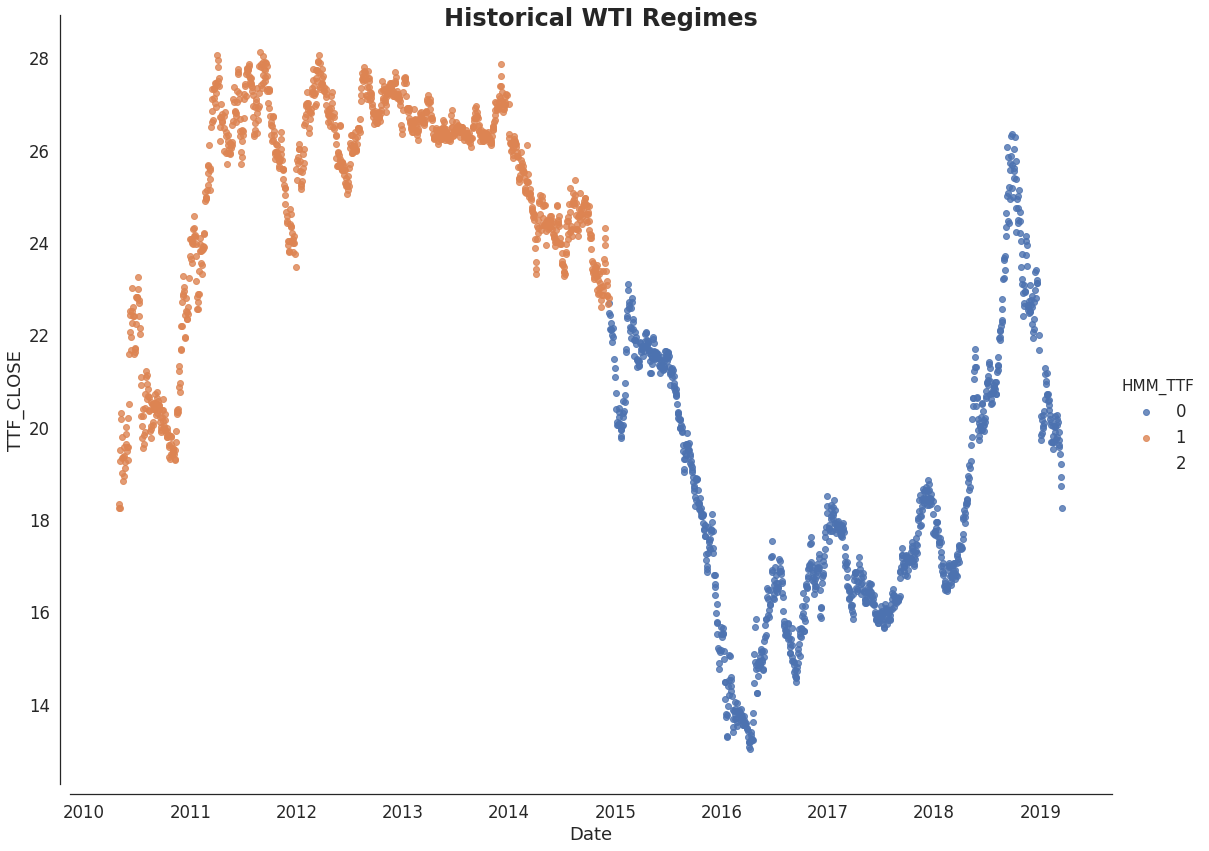

In [47]:
style_kwds = {'xtick.major.size': 1, 'ytick.major.size': 1,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set(font_scale=1.5)

states = (pd.DataFrame(data, columns=['states'],index=data.index).join(data, how='inner')
          .reset_index(drop=False)
          )
# print(data.index)
# display(states)
sns.set_style('white', style_kwds)
# order = [0,1]
order = range(3)
fg = sns.FacetGrid(data=states, hue='HMM_TTF', hue_order=order,
                    aspect=1.31, size=12)
fg.map(plt.scatter, 'Date', 'TTF_CLOSE', alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical WTI Regimes', fontsize=24, fontweight='demi')
fg.savefig('Hidden Markov (Mixture) Model_SPY Regimes.png')